In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


In [39]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [40]:
df_train.shape

(13730, 167)

In [41]:
answer = pd.DataFrame()
answer['NU_INSCRICAO'] = df_test['NU_INSCRICAO']

In [42]:
print('A base de treino tem {} linhas e {} colunas.\nA base de teste contém {} linhas e {} colunas.'.format(
                                                                                                df_train.shape[0], 
                                                                                                df_train.shape[1],
                                                                                                df_test.shape[0],
                                                                                                df_test.shape[1]))

A base de treino tem 13730 linhas e 167 colunas.
A base de teste contém 4576 linhas e 47 colunas.


In [43]:
df_train.describe()

,Unnamed: 0,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,...,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041
count,13730.000000,13730.0,1.373000e+04,13730.000000,13730.000000,13202.000000,13730.000000,13730.000000,1.312100e+04,13121.000000,...,6354.000000,6354.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,2938.000000
mean,2288.173926,2016.0,3.088548e+06,30.736708,21.593809,0.116043,2.185652,1.048871,3.057946e+06,30.429159,...,4.530217,3.962858,4.645594,4.678441,3.341515,4.458995,3.724618,3.506409,4.442098,3.671545
std,1321.230607,0.0,9.890495e+05,9.862405,7.043654,0.365986,1.007285,0.258895,9.703020e+05,9.670030,...,1.027613,1.625356,0.920998,0.865039,1.711930,1.200172,1.689362,1.718858,1.181549,1.746444
min,0.000000,2016.0,1.100023e+06,11.000000,13.000000,0.000000,0.000000,0.000000,1.100023e+06,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1144.000000,2016.0,2.307650e+06,23.000000,17.000000,0.000000,1.000000,1.000000,2.306900e+06,23.000000,...,5.000000,3.000000,5.000000,5.000000,2.000000,5.000000,3.000000,2.000000,4.000000,3.000000
50%,2288.000000,2016.0,3.118601e+06,31.000000,19.000000,0.000000,3.000000,1.000000,3.106200e+06,31.000000,...,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000
75%,3432.000000,2016.0,3.550308e+06,35.000000,23.000000,0.000000,3.000000,1.000000,3.549805e+06,35.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,4586.000000,2016.0,5.300108e+06,53.000000,67.000000,3.000000,5.000000,4.000000,5.300108e+06,53.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [44]:
df_train.head(5)

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [45]:
df_train.dtypes.value_counts()

int64      79
object     60
float64    28
dtype: int64

In [46]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Columns: 167 entries, Unnamed: 0 to Q050
dtypes: float64(28), int64(79), object(60)
memory usage: 17.5+ MB


In [47]:
df_train.columns

Index(['Unnamed: 0', 'NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       ...
       'Q041', 'Q042', 'Q043', 'Q044', 'Q045', 'Q046', 'Q047', 'Q048', 'Q049',
       'Q050'],
      dtype='object', length=167)

In [48]:
df_train.drop(['Unnamed: 0', 'NU_ANO'], axis = 1, inplace = True) #Drop Unamed: 0 and NU_ANO features

In [49]:
df_train.corr()["NU_NOTA_MT"].sort_values(ascending = False).head(15) #Averiguar as maiores correlações com o target (A nota de matemática)

NU_NOTA_MT                 1.000000
NU_NOTA_CN                 0.584941
NU_NOTA_CH                 0.529594
NU_NOTA_LC                 0.494695
NU_NOTA_REDACAO            0.379376
TP_DEPENDENCIA_ADM_ESC     0.373233
NU_NOTA_COMP3              0.350307
NU_NOTA_COMP5              0.343337
NU_NOTA_COMP4              0.342282
NU_NOTA_COMP2              0.335638
NU_NOTA_COMP1              0.299402
CO_MUNICIPIO_NASCIMENTO    0.113416
CO_UF_NASCIMENTO           0.112236
CO_MUNICIPIO_PROVA         0.109433
CO_MUNICIPIO_RESIDENCIA    0.108850
Name: NU_NOTA_MT, dtype: float64

In [50]:
features = ["NU_NOTA_CN","NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_REDACAO", "NU_NOTA_COMP3", "NU_NOTA_COMP5",  
            "NU_NOTA_COMP4", "NU_NOTA_COMP2", "NU_NOTA_COMP1", 'TP_DEPENDENCIA_ADM_ESC']
target = ["NU_NOTA_MT","NU_NOTA_CN","NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_REDACAO", "NU_NOTA_COMP3", "NU_NOTA_COMP5",  
            "NU_NOTA_COMP4", "NU_NOTA_COMP2", "NU_NOTA_COMP1", 'TP_DEPENDENCIA_ADM_ESC']

In [51]:
df_train[features].isnull().sum().sort_values(ascending = False)
df_test[features].isnull().sum().sort_values(ascending = False).head(15)

total = df_train[features].isnull().sum().sort_values(ascending=False)
percent = df_train[features].isnull().sum()/df_train[features].isnull().count().sort_values(ascending=False)
missing_values = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_values

,Total,Percent
TP_DEPENDENCIA_ADM_ESC,9448,0.688128
NU_NOTA_COMP1,3597,0.261981
NU_NOTA_COMP2,3597,0.261981
NU_NOTA_COMP4,3597,0.261981
NU_NOTA_COMP5,3597,0.261981
NU_NOTA_COMP3,3597,0.261981
NU_NOTA_REDACAO,3597,0.261981
NU_NOTA_LC,3597,0.261981
NU_NOTA_CH,3389,0.246832
NU_NOTA_CN,3389,0.246832


In [52]:
features.remove('TP_DEPENDENCIA_ADM_ESC')
target.remove('TP_DEPENDENCIA_ADM_ESC')
features, target

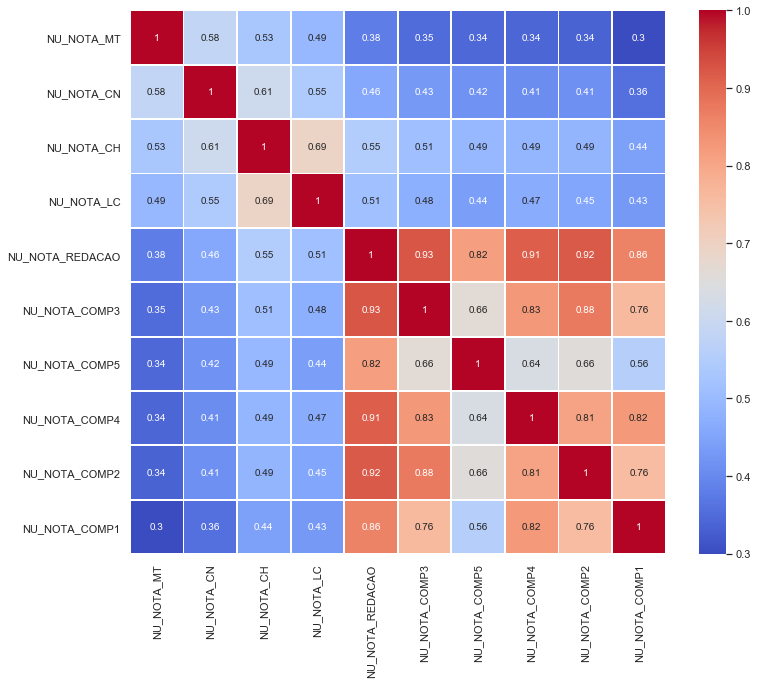

In [54]:
corr = df_train[target].corr()
ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr,  annot=True, annot_kws={"size": 10}, linewidths=.8, cmap = "coolwarm")

In [55]:
df_train = df_train[target].fillna(0) #O resultado de fillna com a média deu 73%, com 0 deu 93.65%

df_test = df_test[features].fillna(0)

df_train

,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_COMP3,NU_NOTA_COMP5,NU_NOTA_COMP4,NU_NOTA_COMP2,NU_NOTA_COMP1
0,399.4,436.3,495.4,581.2,520.0,120.0,80.0,80.0,120.0,120.0
1,459.8,474.5,544.1,599.0,580.0,120.0,80.0,120.0,120.0,140.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
13725,403.2,438.2,419.7,394.5,440.0,80.0,40.0,80.0,120.0,120.0
13726,452.4,423.8,557.9,533.0,560.0,120.0,80.0,120.0,120.0,120.0
13727,398.0,460.5,528.9,569.3,600.0,120.0,120.0,120.0,120.0,120.0
13728,386.6,422.5,621.7,569.0,460.0,80.0,100.0,80.0,100.0,100.0


In [56]:
df_test

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_COMP3,NU_NOTA_COMP5,NU_NOTA_COMP4,NU_NOTA_COMP2,NU_NOTA_COMP1
0,464.8,443.5,431.8,420.0,80.0,40.0,100.0,80.0,120.0
1,391.1,491.1,548.0,580.0,120.0,100.0,120.0,120.0,120.0
2,595.9,622.7,613.6,320.0,40.0,80.0,80.0,40.0,80.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,592.9,492.6,571.4,320.0,60.0,0.0,80.0,80.0,100.0
...,...,...,...,...,...,...,...,...,...
4571,398.3,558.2,511.6,500.0,120.0,40.0,100.0,120.0,120.0
4572,427.6,579.7,471.1,520.0,100.0,100.0,120.0,100.0,100.0
4573,639.2,643.8,604.9,640.0,120.0,80.0,140.0,140.0,160.0
4574,427.1,467.9,540.2,520.0,80.0,80.0,140.0,80.0,140.0


In [19]:
y_train = df_train['NU_NOTA_MT']
x_train = df_train[features]

x_test = df_test

In [20]:
sc = StandardScaler()  
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test)

In [21]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor( 
           criterion='mae', 
           max_depth=8,
           max_leaf_nodes=None,
           min_impurity_split=None,
           min_samples_leaf=1,
           min_samples_split=2,
           min_weight_fraction_leaf=0.0,
           n_estimators= 100,
           n_jobs=-1,
           random_state=0,
           verbose=0,
           warm_start=False)

In [22]:
reg.fit(x_train, y_train)
y_pred_test = reg.predict(x_test)
y_pred_train = reg.predict(x_train)

In [23]:
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train).round(8) )
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train).round(8) ) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)).round(8))

MAE: 40.35566584
MSE: 3648.26877588
RMSE: 60.40090046


In [24]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
y_prest_train = lr.predict(x_train)
y_prest_test = lr.predict(x_train)

In [26]:
lr.score(x_train, y_train)

0.9026723873062031

In [27]:
answer['NU_NOTA_MT'] = np.around(y_pred_test,2)

In [28]:
answer.tail()

,NU_INSCRICAO,NU_NOTA_MT
4571,dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,443.63
4572,a75fa8770257e7c9368d059fe53d9ef431f4bdef,460.48
4573,655fa6306720ff16e825903b5422a46608a77545,685.30
4574,1f4bc3e3d56212d500625bfe8ac78ccff4362293,442.31
4575,adf0d15b54317b6564ef56dad2b775bbb0ef50cc,0.00


In [29]:
answer.to_csv("answer.csv", sep = ",", index=False, header=True)